<a href="https://colab.research.google.com/github/willclopes/Portfolio-Data-Science/blob/master/15_ML_Regressao_Previsao_do_preco_do_voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão do preço do voo (Regressão)
---
By Willian C Lopes




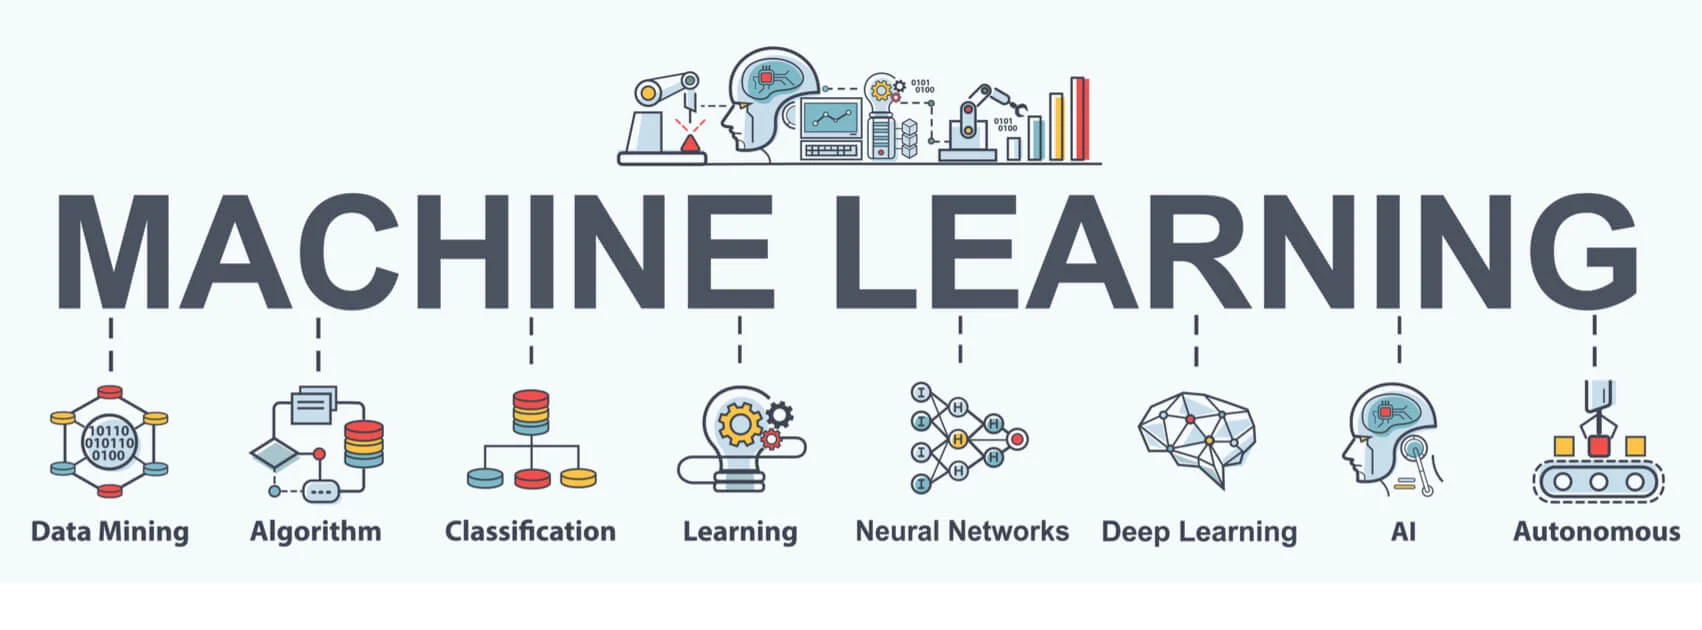

# **Introdução**

O aprendizado de máquina (ML) é o estudo de algoritmos de computador, que melhoram com a experiência e o uso de dados. Os algoritmos de aprendizado de máquina criam um modelo com base em dados de amostra (dados de treinamento) e fazem previsões ou decisões usando esse modelo sem serem programados para isso.

Os algoritmos de aprendizado de máquina têm uma ampla variedade de aplicações, como detecção de fraudes, filtragem de e-mail, etc. 

Pode-se pensar nos algoritmos de aprendizado de máquina como caindo em uma das três categorias principais - aprendizado supervisionado, aprendizado não supervisionado e a aprendizagem por reforço . A diferença é simples, mas muito importante.

- **Aprendizagem Supervisionada:** fazem uso de um conjunto de treinamento de dados de entrada e saída. O algoritmo aprende uma relação entre os dados de entrada e saída do conjunto de treinamento e, em seguida, usa essa relação para prever a saída de novos dados. Um dos objetivos de aprendizagem supervisionada mais comuns é a classificação. O aprendizado de classificação visa usar as informações aprendidas para prever a associação de uma determinada classe. O exemplo de pontuação de crédito representa o aprendizado de classificação, pois prevê pessoas inadimplentes.

- **A aprendizagem não supervisionad** visa fazer observações em dados onde não há resultado ou resultado conhecido, por meio da dedução de padrões e estruturas subjacentes nos dados. A aprendizagem por associação é uma das formas mais comuns de aprendizagem não supervisionada, em que o algoritmo procura associações entre os dados de entrada. O exemplo de análise da cesta de compras representa o aprendizado de associação.

- **A aprendizagem por reforço** é uma forma de aprendizagem por 'tentativa e erro' em que os dados de entrada estimulam o algoritmo a uma resposta e onde o algoritmo é 'punido' ou 'recompensado' dependendo se a resposta foi a desejada. A robótica e a tecnologia autônoma fazem grande uso dessa forma de aprendizado,

## **Contexto:**

Um dos usos da aprendizado de máquina está na 'indústria da aviação', para prever os preços dos voos. Existem vários fatores / características que impactam os preços dos voos - distância, tempo de voo, número de paradas, etc. Esses fatores ajudam a criar um padrão para decidir o preço de um voo, e os modelos de aprendizado de máquina são treinados neste padrão para fazer o previsões no futuro, automatizando o processo e tornando o processo mais rápido.



## **Declaração do problema**

A tarifa de uma passagem aérea varia com base em vários aspectos, como duração, número de paradas, origem, dia, companhia aérea e muitos outros aspectos. Cada companhia aérea tem seus próprios algoritmos e regras para decidir a tarifa. O aprendizado de máquina nos ajuda a prever o preço muito mais próximo do que o preço real. É sempre difícil adivinhar o preço do voo porque os preços são dinâmicos. 

Para resolver este problema, foram fornecidos preços de bilhetes de avião para várias companhias aéreas entre os meses de março e junho de 2019 e entre várias cidades, com os quais pretendemos construir um modelo que prevê os preços dos voos usando vários atributos do conjunto de dados.


### **- O que faremos?**

Pretendemos construir um modelo que prevê os preços dos voos usando vários atributos do conjunto de dados.

Este artigo explica o processo completo para construir um modelo de aprendizado de máquina. A seguir mencionadas são as várias fases pelas quais iremos passar, ao longo do projeto:

1. Análise exploratória de dados e modelagem de dados
2. Detecção de outlier e tratamento de assimetria
3. Codificando os dados - Label Encoder
4. Escalonando os dados - Escalador padrão
5. Adaptando os modelos de aprendizado de máquina
6. Validação cruzada do modelo selecionado
7. Modelo de hiper-ajuste
8. Salvar o modelo final e a previsão usando o modelo salvo



### **- Descrição dos dados**

A seguir está a descrição dos recursos disponíveis no conjunto de dados -
1. Companhia aérea : o nome da companhia aérea.
2. Date_of_Journey : A data da viagem
3. Fonte : a fonte da qual o serviço começa.
4. Destino : o destino onde o serviço termina.
5. Rota : a rota percorrida pelo voo para chegar ao destino.
6. Dep_Time : o momento em que a viagem começa na origem.
7. ARRIVAL_TIME : Hora de chegada ao destino.
8. Duração : Duração total do voo.
9. Total_Stops : Total de paradas entre a origem e o destino.
10. Additional_Info : informações adicionais sobre o voo
11. Preço : o preço do ingresso




### **- Baixando os dados**

O conjunto de dados que será usado aqui fora obtido do Kaggle. Aqui, o conjunto de dados fornecido será analisado com base em todas as informações fornecidas.

Tem-se algumas opções para baixar a base de dados, entre elas estão:

- No [Kaggle](https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/)

- No meu [Github](https://github.com/willclopes/Portfolio-Datasets/tree/main/Flight_Ticket_Participant_Datasets)




---



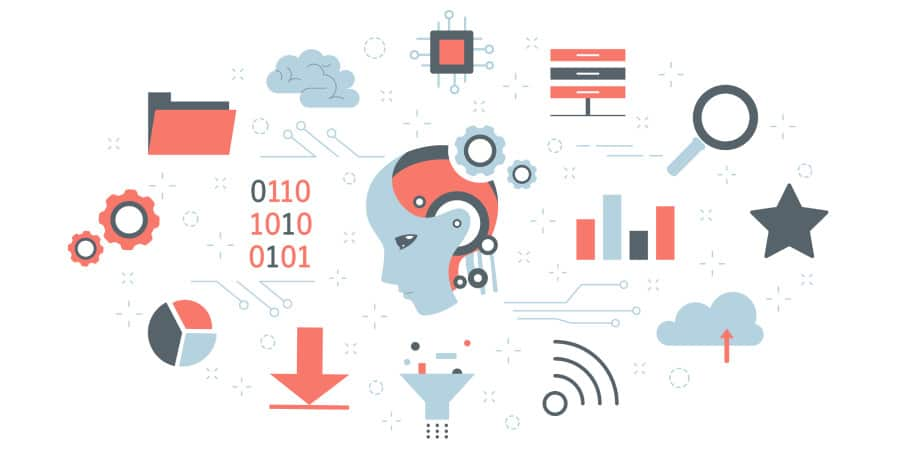

## Importar as Bibliotecas e o DataSet

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib 
matplotlib.rcParams ['figure.figsize'] = (10.0, 6.0) 
sns.set (style = "white") 


%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
#df_train_flight=pd.read_excel("Data_Train.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
#df_test_flight=pd.read_excel("Test_set.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
#df_train_flight["dataset"]="train"
#df_test_flight["dataset"]="test"

In [ ]:
#Merging os datasets
#df_flight=pd.concat([df_train_flight,df_test_flight],ignore_index=True)
#df_flight


In [ ]:
df_flight = pd.read_csv("https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/Flight_Ticket_Participant_Datasets/df_flight_merge.csv")
df_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-01-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-05 05:50:00,2022-01-05 13:15:00,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-05 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882.0,train
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-01-05 18:05:00,2022-01-05 23:30:00,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-01-05 16:50:00,2022-01-05 21:35:00,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2022-01-05 20:30:00,2022-06-07 20:25:00,23h 55m,1 stop,No info,NaN,test
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2022-01-05 14:20:00,2022-01-05 16:55:00,2h 35m,non-stop,No info,NaN,test
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2022-01-05 21:50:00,2022-03-07 04:25:00,6h 35m,1 stop,No info,NaN,test
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2022-01-05 04:00:00,2022-01-05 19:15:00,15h 15m,1 stop,No info,NaN,test


In [ ]:
Flight_Train = df_flight[df_flight["dataset"]=="train"]
del Flight_Train['dataset']
Flight_Train.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-01-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-05 05:50:00,2022-01-05 13:15:00,7h 25m,2 stops,No info,7662.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-05 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-01-05 18:05:00,2022-01-05 23:30:00,5h 25m,1 stop,No info,6218.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-01-05 16:50:00,2022-01-05 21:35:00,4h 45m,1 stop,No info,13302.0


In [ ]:
Flight_Train.shape

(10683, 11)

In [ ]:
Flight_Train.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [ ]:
Flight_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1001.5+ KB


In [ ]:
Flight_Train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Exploração Inicial do Conjunto de Dados 

### 1. Forma (dimensões) do DataFrame

Temos 2 conjuntos de dados aqui - conjunto de treinamento e conjunto de teste.

O conjunto de treinamento contém os recursos, juntamente com os preços dos voos. Ele contém 10683 registros, 10 recursos de entrada e 1 coluna de saída - 'Preço'.

O conjunto de teste contém 2671 registros e 10 recursos de entrada. A coluna de saída 'Preço' precisa ser prevista neste conjunto. Usaremos técnicas de regressão aqui, uma vez que a saída prevista será um valor contínuo.

### 2. Tipos de dados das várias colunas

Logo após, exibimos todos os tipos de dados das colunas. Isso nos ajuda a entender o tipo de dados com os quais estamos lidando, em termos de distribuições numéricas e categóricas. Isso também lançará luz sobre alguns dos gráficos e plotagens exploratórias a serem usados.

### 3. Valores Nulos e Faltantes

Existem alguns valores nulos que iremos tratá-los futuramente.

### Análise Exploratória

A Análise de Dados é um procedimento para coletar dados brutos do que convertê-los em dados úteis e informativos que ajudarão na tomada de decisões claras pelo usuário. Os dados serão coletados e analisados ​​para responder algumas questões.

Identificamos alguns pontos na primeira análise: 

1. A coluna Rota contém uma lista de cidades que precisaremos separar, uma vez que teríamos várias combinações em nosso conjunto de dados.

2. A coluna Horário de chegada tem datas anexadas, as quais precisaremos separar. São os casos em que o vôo decola da origem em uma data e chega ao destino no dia seguinte.

3. A duração está em um formato de string, que precisaremos converter para o tipo inteiro.

4. O total de paradas também tem o texto 'paradas' adicionado junto com o número de paradas e certas colunas como 'sem parar', que precisaremos converter para tipos inteiros.

Executamos o comando data.info (), que nos fornece as informações sobre o número de valores presentes em cada coluna e os tipos de dados de cada coluna.

Observamos que temos todas as colunas como tipos de dados 'objeto', e apenas a coluna 'Preço' (a saída) é do tipo inteiro. Como sabemos o que significam nossas colunas, sabemos quais colunas precisamos tratar!

Agora vamos começar a explorar as colunas disponíveis em nosso conjunto de dados. A primeira coisa que fazemos é criar uma lista de colunas categóricas e verificar os valores exclusivos presentes nessas colunas -


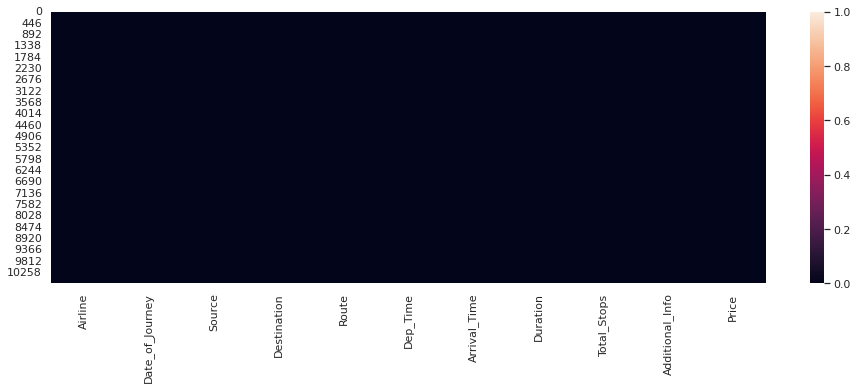

In [ ]:
#Procurando por valores nulos, se houver, no mapa de calor
plt.figure(figsize = (16,5))
sns.heatmap(Flight_Train.isnull()) 

AS Colunas "Rota" e "Total_Stops" têm 1-1 valores nulos. Existem 2 maneiras de se livrar desses valores NULL. O primeiro é eliminar valores nulos, mas não é uma boa escolha. 2º é substituir os valores NUL por média, mediana ou moda. Nesse caso, o tipo de variável é int. Podemos usar média, mediana ou modo, mas no caso de objeto, temos que usar modo.

In [ ]:
#Substituindo valores nulos pela moda
Flight_Train['Route'].fillna(Flight_Train['Route'].mode()[0], inplace=True)
Flight_Train['Total_Stops'].fillna(Flight_Train['Total_Stops'].mode()[0], inplace=True)

In [ ]:
Flight_Train.isnull().sum(axis = 0)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Valores NULL substituídos. Agora não há mais valores NULL presentes no conjunto de dados.

## Análise Univariada

### Fonte de Voo

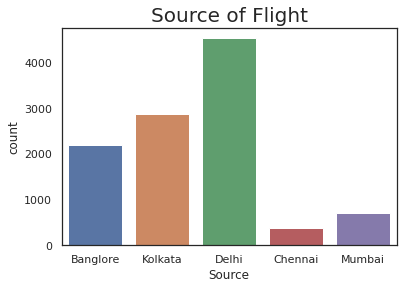

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
sns.countplot(x="Source", data=Flight_Train)
plt.title("Source of Flight", fontsize = 20)
plt.show()
Flight_Train['Source'].value_counts()

Podemos ver claramente que Delhi possui a maior quantidade de saida de voos

### Destino de Voo

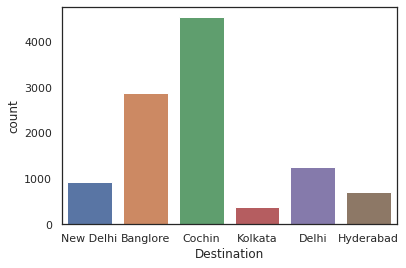

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
sns.countplot(x="Destination", data=Flight_Train)
plt.show()
Flight_Train['Destination'].value_counts()

O mesmo acontece com os detinos, podemos ver claramente que Delhi possui a maior quantidade de destino.

### Total paradas de voo

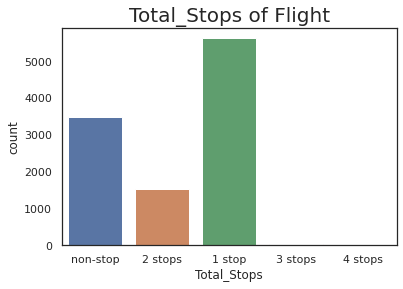

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
sns.countplot(x="Total_Stops", data=Flight_Train)
plt.title("Total_Stops of Flight", fontsize = 20)
plt.show()
Flight_Train['Total_Stops'].value_counts()

Apenas 1 voo parou em 4 locais, 45 voos pararam em 3 locais e 1520 voos pararam em 2 locais.

### Informacoes Adicionais do VOO

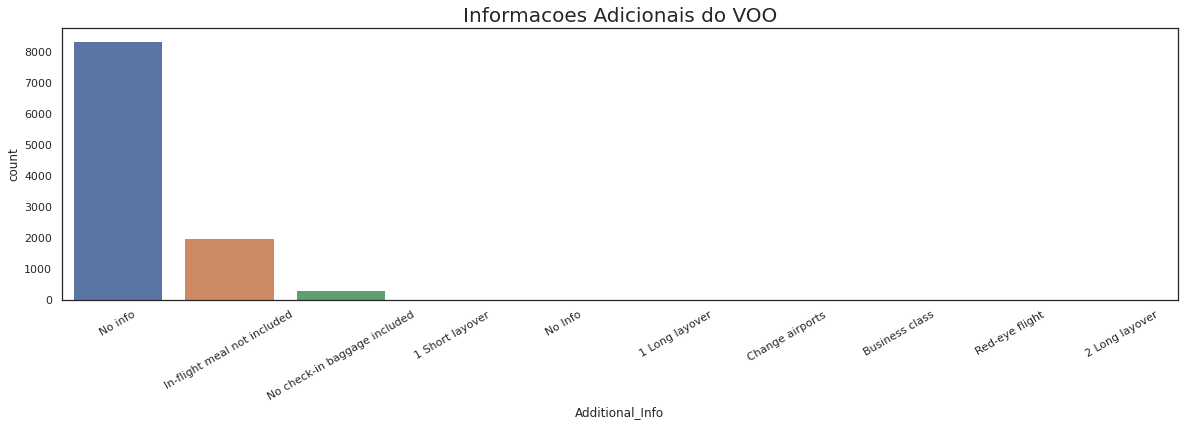

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(x="Additional_Info", data=Flight_Train) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Informacoes Adicionais do VOO", fontsize = 20)
plt.show() #plotting the graph
Flight_Train['Additional_Info'].value_counts()

A refeição de 1982 vezes não está incluída no voo e a bagagem de check-in 320 vezes não foi incluída

### CIA aérea

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


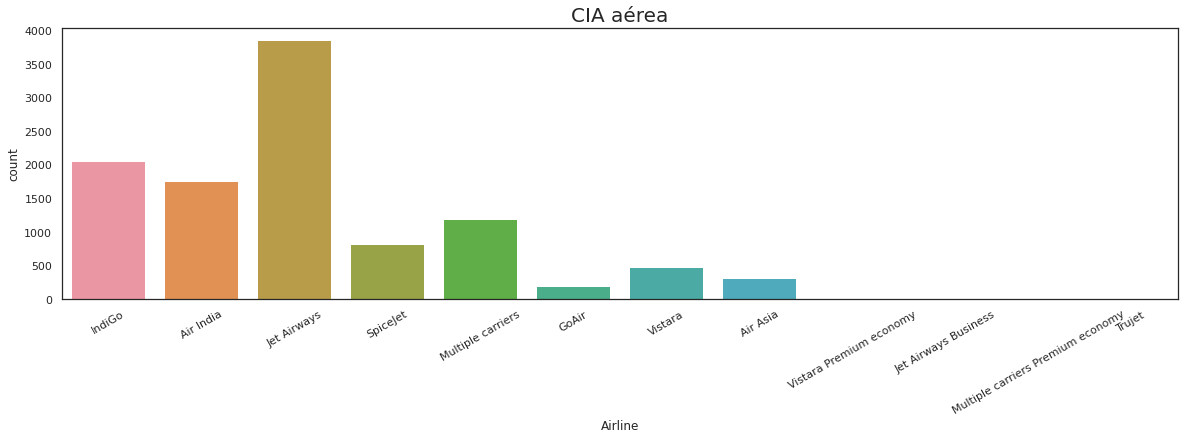

In [ ]:
print(Flight_Train['Airline'].value_counts())
plt.figure(figsize = (20,5))  
ax=sns.countplot(x="Airline", data=Flight_Train)  
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("CIA aérea", fontsize = 20)  
plt.show()  

Os voos da Jet Airways Airlines voaram 3849 vezes enquanto o voo da Trujet voou 1 vez.

## Bi-variate Analysis

### Data da viagem vs preço

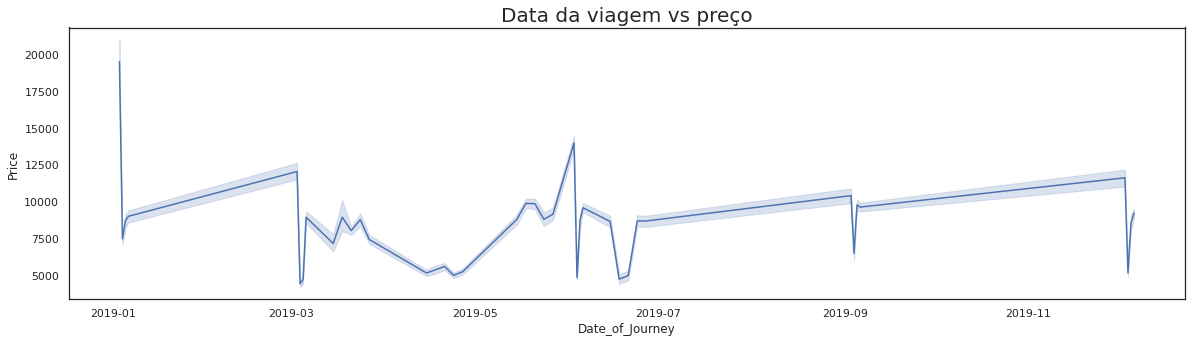

In [ ]:
Flight_Train['Date_of_Journey'] = pd.to_datetime(Flight_Train['Date_of_Journey'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date_of_Journey",y="Price",  data=Flight_Train)
plt.title("Data da viagem vs preço", fontsize = 20)
plt.show()

Em janeiro, os preços dos voos iniciais estavam altos (20.000) e repentinamente caíram para 7.500. 

Depois disso, os preços dos voos aumentaram ligeiramente de janeiro a março de 8.000 a 12.500. 

Em março e abril, os preços dos voos diminuíram ligeiramente e aumentaram várias vezes. De maio a junho, os preços estão em alta. 

Os preços de junho e julho estão subindo e descendo. 

De julho a setembro, o preço aumenta repentinamente e, de novo, está subindo até meados de novembro.

### Preço vs Informações Adicionais

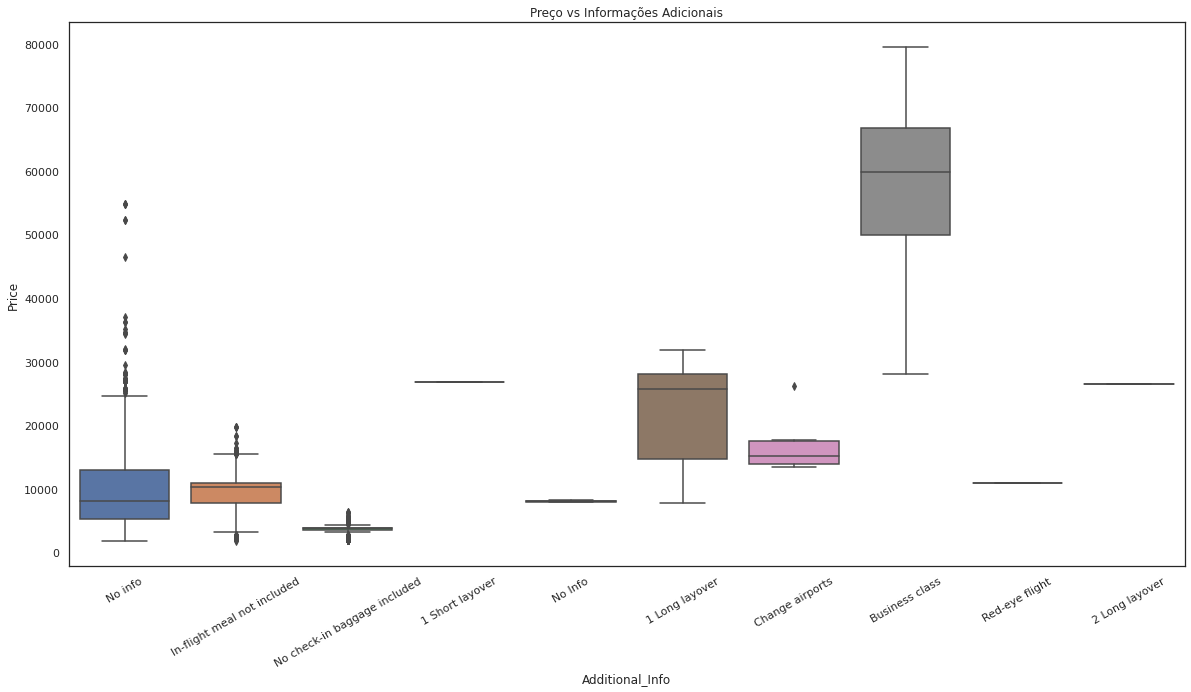

In [ ]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(Flight_Train['Additional_Info'], Flight_Train['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Preço vs Informações Adicionais')
plt.show()

Aqui, poucas coisas podem ser notadas -

- O preço do voo é muito baixo quando Nenhuma bagagem para check-in é permitida.

- Quando o cliente escolhe a Business Class naquele momento, o preço sobe muito.

- Quando nenhuma refeição é fornecida no voo, os preços dos voos temporais são sempre inferiores a 20.000.

### Preço vs Origem

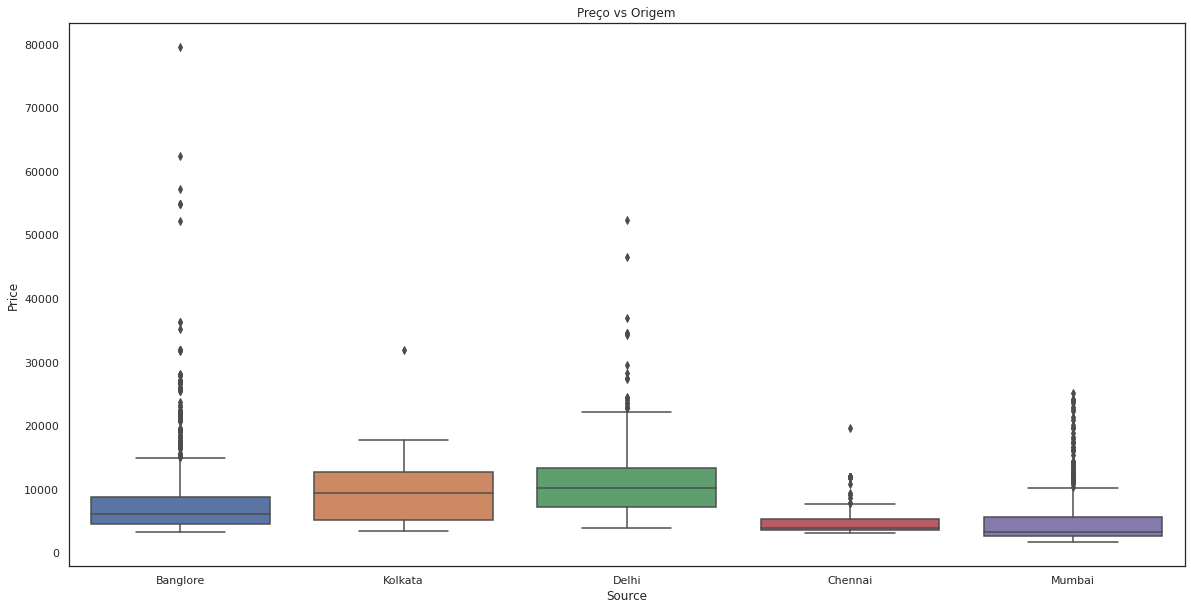

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(Flight_Train['Source'], Flight_Train['Price'])
plt.title('Preço vs Origem')
plt.show()

Aqui, poucas coisas podem ser notadas -

- De Chennai e Mumbai, os voos são mais baratos em comparação com outras fontes.
- Voos que voam de Calcutá têm preço inferior a 20 mil e apenas uma vez passou perto de 32 mil.
- Os voos que partem de Bangladesh têm preços muito altos.

### Preço vs Destino

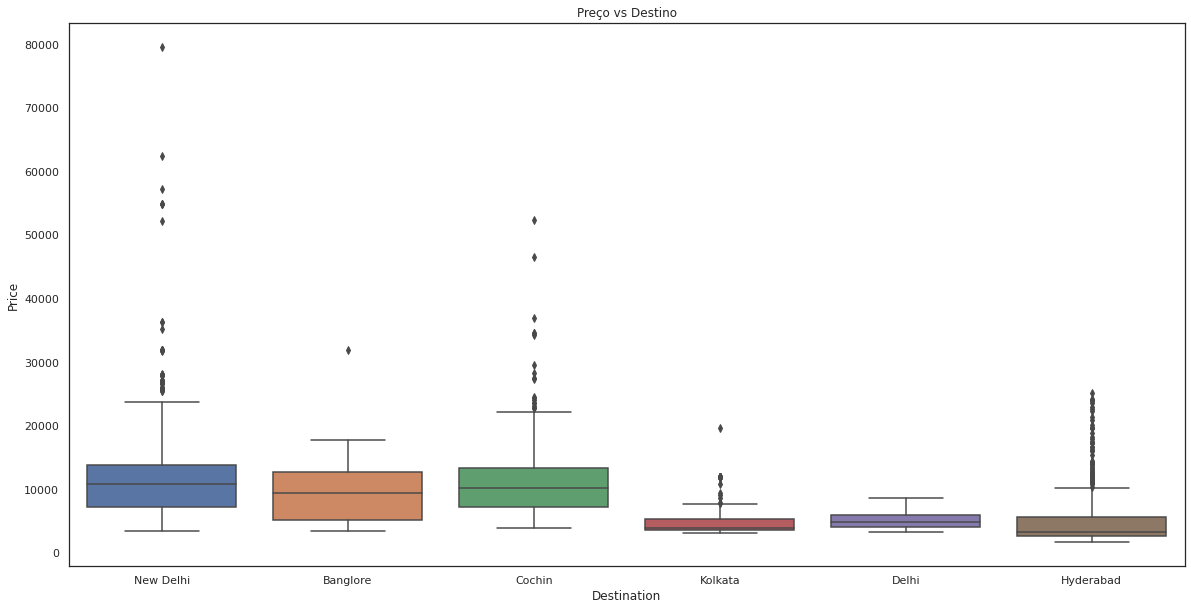

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(Flight_Train['Destination'], Flight_Train['Price'])
plt.title('Preço vs Destino')
plt.show()

- Os voos de Calcutá, Delhi e Hyderabad são mais baratos do que outros preços de destino.

- As tarifas dos voos para Nova Delhi são muito altas, enquanto as tarifas dos voos para Cochin também são altas.

- Os preços dos voos de Bangladesh são sempre inferiores a 20k, mas apenas no caso de ir para 32k.

### Preço vs Total de paradas

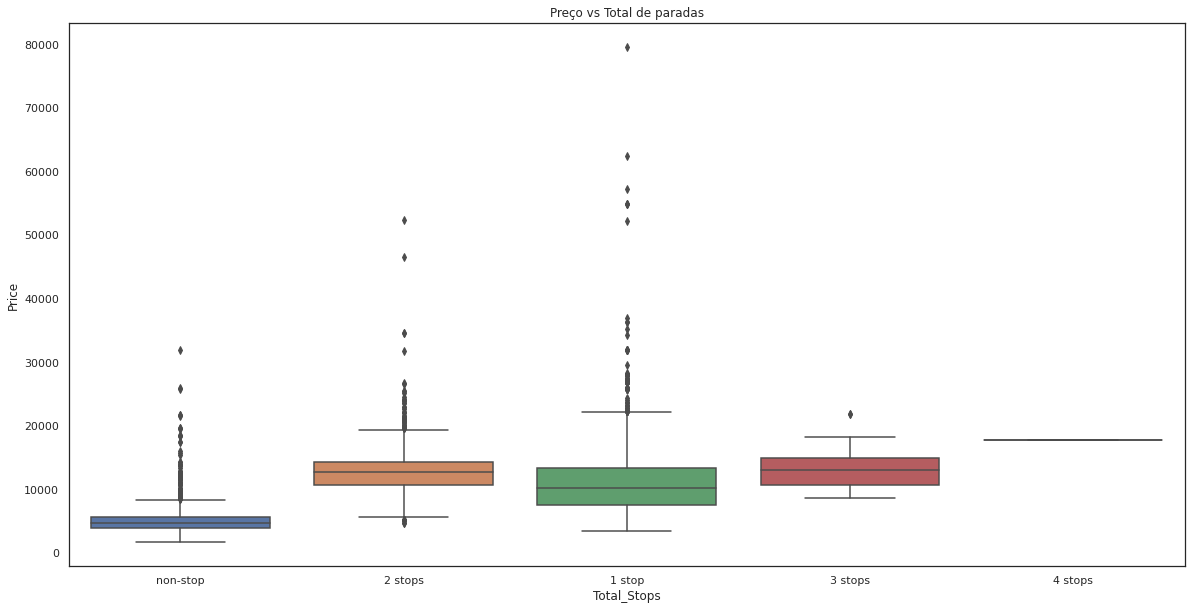

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(Flight_Train['Total_Stops'], Flight_Train['Price'])
plt.title('Preço vs Total de paradas')
plt.show()

Aqui, poucas coisas podem ser notadas 

- Quando o número de paradas é 3, os preços ficam em torno de 20k

- No caso de voos de 2 e 3 paradas, os preços sobem algumas vezes a mais.

- Quando as paradas são 0, os preços dos voos no tempo são muito menores.

- Os voos sem escalas são mais baratos em comparação com outros voos.

### Preço vs CIA Aerea

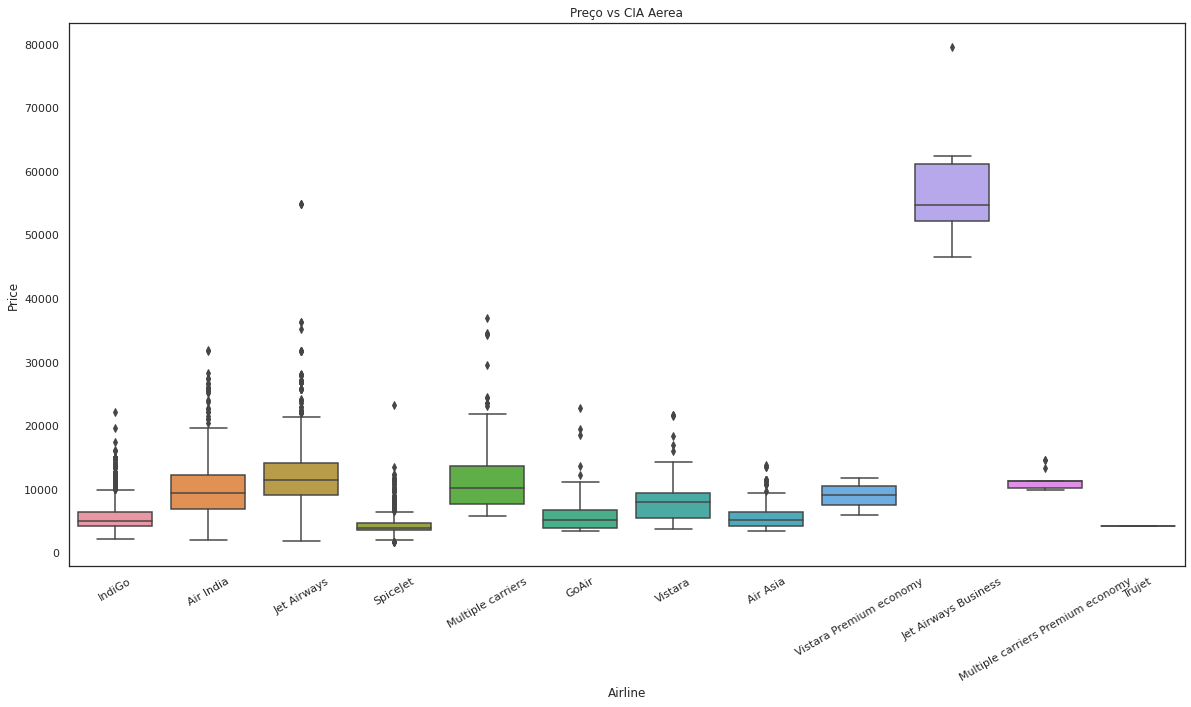

In [ ]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(Flight_Train['Airline'], Flight_Train['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Preço vs CIA Aerea')
plt.show()

Os voos de negócios da Jet Airways são sempre caros e os voos da SpiceJet são mais baratos.

## Feature Engineering

Aqui faremos a extração das informações de todas as colunas, o que ajudará a fazer uma previsão melhor e precisa. 

Em Additional_Info quando alguma informação é fornecida que reflete altamente no preço do voo porque quando uma pessoa viaja em classe executiva essa é uma informação adicional, a tarifa do voo fica muito alta e quando Nenhuma bagagem por check-in incluída os preços da tarifa são muito baixos. 

O número total de paradas também ajudará a prever a tarifa do voo. 

Quando os voos não param, as tarifas são muito baixas, quando há 1 parada, o preço da viagem aumenta e assim por diante. 

A duração da viagem é um dos principais fatores que podem ajudar a prever a tarifa do voo. 

Quando a duração aumenta, o custo da viagem aumenta esse impacto diretamente na tarifa do voo.

In [ ]:
#Verificar os valores únicos contará com um número.
Flight_Train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

É claramente visível que No Info é Nenhuma informação, é apenas um erro de digitação.

In [ ]:
#Substituindo Sem Informação por Sem Informação
Flight_Train["Additional_Info"]=Flight_Train["Additional_Info"].replace("No Info","No info")

In [ ]:

#Verificando o número de paradas totais
Flight_Train['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
#Substituindo String por numérico para melhor previsão
Flight_Train.replace({"non-stop": 0, 
                      "1 stop": 1, 
                      "2 stops": 2, 
                      "3 stops": 3, 
                      "4 stops": 4
                     }, inplace = True)

In [ ]:
#Verificando o valor da contagem de paradas
Flight_Train['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

Para fazer uma previsão boa e precisa, é necessário obter a Duração da viagem em minutos de horas e minutos. Isso nos dará tempo de viagem em uma escala e aumentará a precisão do projeto.

In [ ]:
#Conversão de duração de string em números
Flight_Train['hour'] = Flight_Train['Duration'].str.split("h").str[0]
Flight_Train['nothing'] = Flight_Train['Duration'].str.split(" ").str[1]
Flight_Train['minute'] = Flight_Train['nothing'].str.split("m").str[0]
Flight_Train.drop('nothing',axis=1,inplace=True)

Dep_Time convertido em minutos que ajudará para uma melhor previsão

In [ ]:
Flight_Train['hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [ ]:
for i in range(0,10682):
    if(Flight_Train['hour'][i] == '5m'):
        Flight_Train["hour"][i] = 0
        Flight_Train["minute"][i] = 5

In [ ]:
import numpy as np
Flight_Train['hour'] = pd.to_numeric(Flight_Train['hour']) #Convertendo objeto em int
Flight_Train['minute'] = pd.to_numeric(Flight_Train['minute']) #Convertendo objeto em int
Flight_Train['minute']=Flight_Train['minute'].replace(np.NaN,0) #Substituindo valores nulos por 0
Flight_Train['minute'] = Flight_Train['minute'].astype('int64') #Convertendo float to int
Flight_Train['Duration'] = Flight_Train['hour']*60 + Flight_Train['minute'] #Convertendo horas e minutos em minutos
Flight_Train.drop('hour',axis=1,inplace=True)
Flight_Train.drop('minute',axis=1,inplace=True)
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-01-05 22:20:00,2022-03-22 01:10:00,170,0,No info,3897.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-05 05:50:00,2022-01-05 13:15:00,445,2,No info,7662.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-05 09:25:00,2022-06-10 04:25:00,1140,2,No info,13882.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-01-05 18:05:00,2022-01-05 23:30:00,325,1,No info,6218.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-01-05 16:50:00,2022-01-05 21:35:00,285,1,No info,13302.0


In [ ]:
#Convertendo data em formato int
import datetime as dt
Flight_Train['Date_of_Journey'] = pd.to_datetime(Flight_Train['Date_of_Journey'])
Flight_Train['Date_of_Journey'] = Flight_Train['Date_of_Journey'].map(dt.datetime.toordinal)
Flight_Train.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,737142,Banglore,New Delhi,BLR → DEL,2022-01-05 22:20:00,2022-03-22 01:10:00,170,0,No info,3897.0
1,Air India,737064,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-05 05:50:00,2022-01-05 13:15:00,445,2,No info,7662.0
2,Jet Airways,737308,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-05 09:25:00,2022-06-10 04:25:00,1140,2,No info,13882.0
3,IndiGo,737398,Kolkata,Banglore,CCU → NAG → BLR,2022-01-05 18:05:00,2022-01-05 23:30:00,325,1,No info,6218.0
4,IndiGo,737062,Banglore,New Delhi,BLR → NAG → DEL,2022-01-05 16:50:00,2022-01-05 21:35:00,285,1,No info,13302.0


In [ ]:
#Temos colunas Total_Stops, então não precisamos da coluna Route
#Temos Dep_Time e Duration que é igual ao tempo de chegada, então não precisamos disso.
Flight_Train.drop('Route',axis=1,inplace=True)
Flight_Train.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,737142,Banglore,New Delhi,2022-01-05 22:20:00,170,0,No info,3897.0
1,Air India,737064,Kolkata,Banglore,2022-01-05 05:50:00,445,2,No info,7662.0
2,Jet Airways,737308,Delhi,Cochin,2022-01-05 09:25:00,1140,2,No info,13882.0
3,IndiGo,737398,Kolkata,Banglore,2022-01-05 18:05:00,325,1,No info,6218.0
4,IndiGo,737062,Banglore,New Delhi,2022-01-05 16:50:00,285,1,No info,13302.0


## Label Encoding

In [ ]:
#Codificação de rótulo para as colunas do objeto
label_list=list(Flight_Train.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for i in label_list:
    Flight_Train[i] = le.fit_transform(Flight_Train[i])

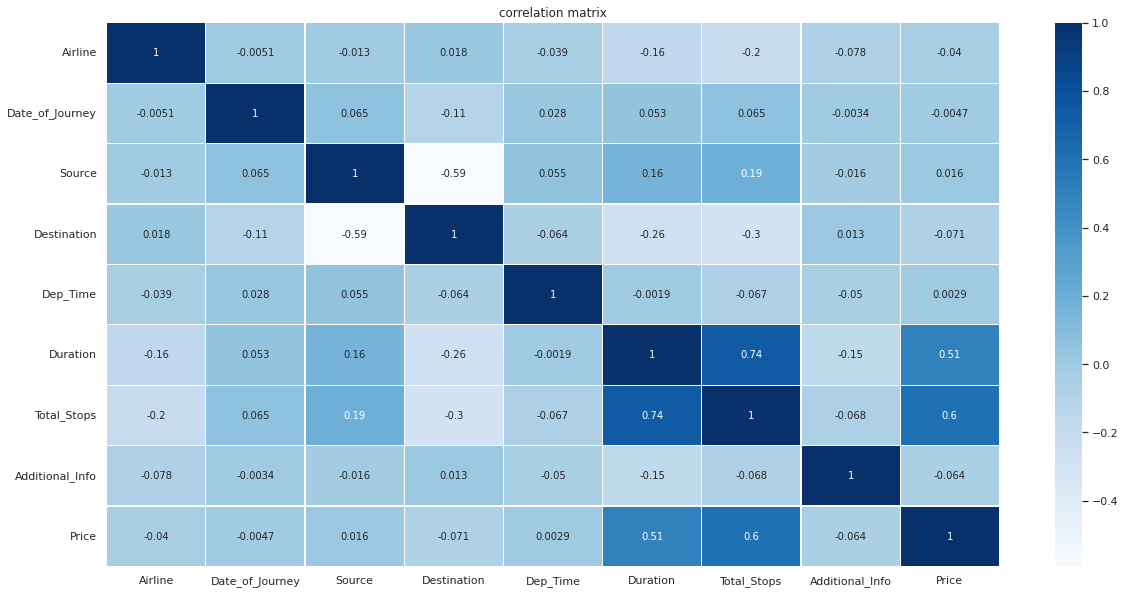

In [ ]:
#Análise multivariada
fig=plt.figure(figsize=(20,10))
hc=Flight_Train.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Olhando para a correlação de outras variáveis ​​em relação ao preço, ou seja, a variável alvo.

Preço é altamente correlacionado com Duração e Total_Stops

In [ ]:
Flight_Train.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,737208.509033,1.952261,1.436113,107.980717,643.093232,0.824207,6.582140,9087.064121
std,2.352155,89.113653,1.177221,1.474782,61.085563,507.862001,0.675199,0.838073,4611.359167
min,0.000000,737062.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1759.000000
25%,3.000000,737142.000000,2.000000,0.000000,55.000000,170.000000,0.000000,7.000000,5277.000000
50%,4.000000,737203.000000,2.000000,1.000000,96.000000,520.000000,1.000000,7.000000,8372.000000
75%,4.000000,737237.000000,3.000000,2.000000,164.000000,930.000000,1.000000,7.000000,12373.000000
max,11.000000,737399.000000,4.000000,5.000000,221.000000,2860.000000,4.000000,8.000000,79512.000000


Há uma diferença entre a média e o desvio padrão do preço, portanto, devem estar presentes outliers.

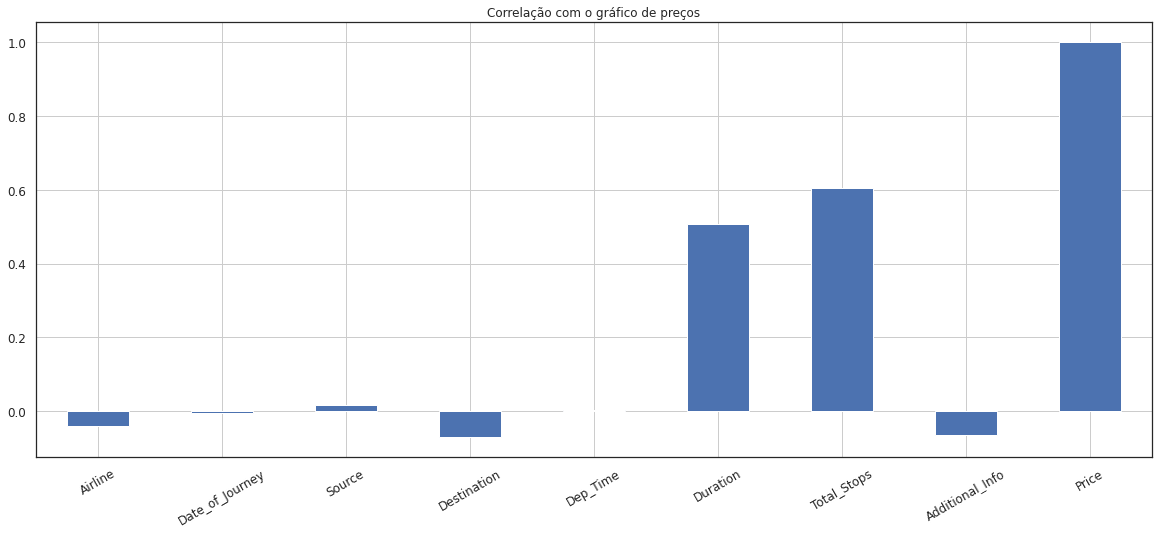

In [ ]:
#Correlação com o preço em relação aos atributos
Flight_Train.corrwith(Flight_Train.Price).plot.bar(
        figsize = (20, 8), title = "Correlação com o gráfico de preços", fontsize = 12,
        rot = 30, grid = True)

Como visto anteriormente, Duration e Total_Stops estão altamente correlacionados com Price

## Remoção de distorções e discrepâncias

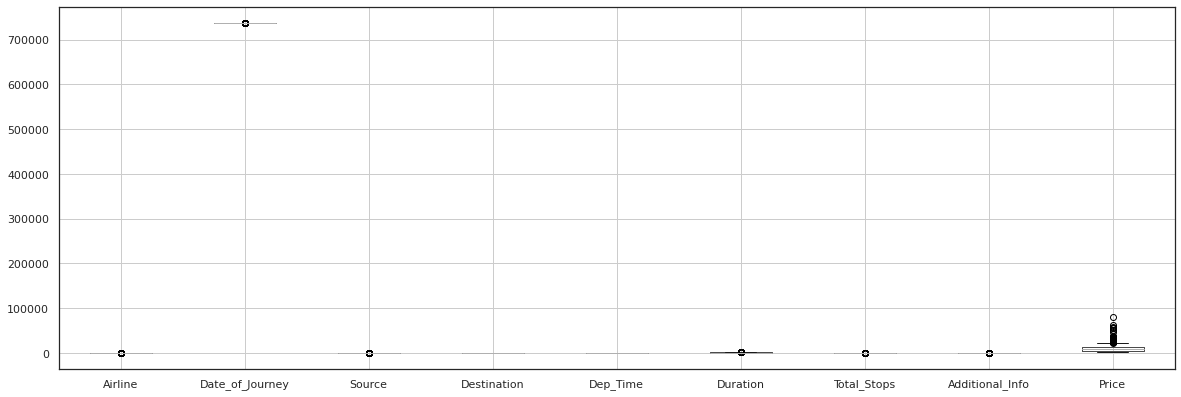

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
Flight_Train.boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25) 
plt.show()

In [ ]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Flight_Train))
print(np.where(z>3))

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   785,   826,   919,   936,   946,   959,   966,
         969,   975,  1043,  1067,  1113,  1196,  1218,  1246,  1341,
        1346,  1424,  1442,  1466,  1478,  1496,  1551,  1629,  1654,
        1657,  1665,  1712,  1785,  1791,  1804,  1918,  2055,  2079,
        2099,  2108,  2172,  2172,  2405,  2481,  2495,  2495,  2553,
        2556,  2556,  2618,  2623,  2633,  2635,  2641,  2654,  2693,
        2718,  2718,  2814,  2822,  2883,  2924,  2924,  3032,  3032,
        3111,  3111,  3157,  3220,  3257,  3317,  3400,  3457,  3496,
        3535,  3535,  3568,  3584,  3700,  3700,  3788,  3790,  3815,
        3815,  3945,  3966,  4012,  4047,  4118,  4118,  4463,  4463,
        4521,  4521,  4655,  4655,  4676,  4760,  4829,  5013,  5013,
        5050,  5136,  5372,  5372,  5439,  5446,  5516,  5628,  5662,
        5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,  5838,
        5856,  5933

In [ ]:
z=np.abs(zscore(Flight_Train))
threshold=3
new_Flight_Train=Flight_Train[(z<3).all(axis=1)]
print(Flight_Train.shape)
print(new_Flight_Train.shape)

(10683, 9)
(10475, 9)


In [ ]:
#verificando quantos dados perdemos
loss_percent=(10683-10475)/10683*100
print(loss_percent)

1.9470186277262942


2% dos dados são perdidos, é aceitável

In [ ]:
#Verificando a assimetria de todas as colunas
new_Flight_Train.skew()

Airline            0.730109
Date_of_Journey    0.486566
Source            -0.438959
Destination        1.266475
Dep_Time           0.183492
Duration           0.779912
Total_Stops        0.230633
Additional_Info   -1.468582
Price              0.415788
dtype: float64

In [ ]:
new_Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,3,737142,0,5,211,170,0,7,3897.0
1,1,737064,3,0,31,445,2,7,7662.0
2,4,737308,2,1,70,1140,2,7,13882.0
3,3,737398,3,0,164,325,1,7,6218.0
4,3,737062,0,5,149,285,1,7,13302.0


Date_of_Journey, Dep_Time, Duration, Total_Stops e Price são numéricos. Nessa assimetria de Duração é alta. Precisa reduzi-lo.

In [ ]:
#Removendo a distorção
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in new_Flight_Train.columns:
    if abs(new_Flight_Train.loc[:,i].skew())>0.55:
        new_Flight_Train.loc[:,i]=PT.fit_transform(new_Flight_Train.loc[:,i].values.reshape(-1,1))

In [ ]:
new_Flight_Train.skew()

Airline           -0.013402
Date_of_Journey    0.486566
Source            -0.438959
Destination        0.041017
Dep_Time           0.183492
Duration          -0.046552
Total_Stops        0.230633
Additional_Info   -1.136146
Price              0.415788
dtype: float64

## Criaando modelos de aprendizado de máquina

### Separando Variáveis em Train e Test

In [ ]:
y = new_Flight_Train["Price"]
x = new_Flight_Train.drop(["Price"], axis=1)

Variáveis ​​x e y separadas para treinar e testar os dados


## Scaling

O scaling é necessário porque há uma enorme diferença nos valores de cada coluna.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() ##Inicializando MinMaxScaler
new = scale.fit(x)  #ajustando nossos dados ao MinMaxScaller
scale_x = new.transform(x) #Transformando os dados
#Configurando as colunas após o dimensionamento
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() 

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,0.419360,0.237389,0.00,1.000000,0.954751,0.482236,0.0,0.165293
1,0.176956,0.005935,0.75,0.000000,0.140271,0.660378,1.0,0.165293
2,0.515086,0.729970,0.50,0.440768,0.316742,0.856249,1.0,0.165293
3,0.419360,0.997033,0.75,0.000000,0.742081,0.599840,0.5,0.165293
4,0.419360,0.000000,0.00,1.000000,0.674208,0.575230,0.5,0.165293


## Encontrando o melhor Random State


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("A melhor acuracia e",maxR2_Score,"em Random_state",maxRS)

A melhor acuracia e 0.5433833750920496 em Random_state 360


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Encontrando o melhor algoritmo

Usando Random Forest, Decission Tree, K Neighbours, Gradient Boosting, Ridge e SVR para obter o melhor algoritmo deles.

In [ ]:
#importando todas as bibliotecas necessárias para encontrar o melhor algoritmo
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [ ]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]


In [ ]:
for m in model:
    print("\n*******************************************************************************\n")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("A diferença entre a pontuação R2 e a pontuação de validação cruzada é - ",r2_score(y_test,pred)-abs(score.mean()))


*******************************************************************************

accuracy score of -> LinearRegression()
R2 Score:                 0.5433833750920496
Mean Absolute Error:      2157.0222129799504
Mean Squared error:       7469680.098465675
Root Mean Squared Error:  2733.0715501914096
[0.52190759 0.5151696  0.54386411 0.52279075 0.49120663 0.51341079
 0.48274606 0.53680671]
cross validation score:   0.5159877806331874
A diferença entre a pontuação R2 e a pontuação de validação cruzada é -  0.027395594458862194

*******************************************************************************

accuracy score of -> RandomForestRegressor()
R2 Score:                 0.8862914898967809
Mean Absolute Error:      770.7671209907126
Mean Squared error:       1860129.8082728009
Root Mean Squared Error:  1363.8657588900753
[0.89111292 0.90479161 0.89739979 0.88912721 0.87461618 0.88480067
 0.88509538 0.8775266 ]
cross validation score:   0.8880587934474665
A diferença entre a pontuaç

O modelo Random Forest teve a maior precisão, ou seja, 0,88% com pontuação de validação cruzada de 0,88%, o que é bom e a diferença é muito menor.

### Ajuste de Hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":range(21,25),
              "criterion":['mse'],
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf":range(1,5)}

clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(x_train,y_train)  
clf.best_params_   

{'criterion': 'mse',
 'max_depth': 21,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [ ]:
clf_pred=clf.best_estimator_.predict(x_test)

In [ ]:
r2_score(y_test, clf_pred)

0.8857930124300628

Agora, o modelo aprendeu quase 0,89%, o que é uma boa pontuação.

### Observações Finais

Neste estudo de caso, desenvolvemos um modelo de Machine Learning  para prever a tarifa das companhias aéreas. Vários recursos foram extraídos do conjunto de dados e combinados para fazer a previsão do preço do voo. 

Com a ajuda das técnicas acima, o modelo proposto é capaz de prever a tarifa do voo com um R quadrado ajustado de 88,59%. 

No entanto, ainda há maneiras de fazer melhorias neste modelo.

No futuro, nosso modelo pode prever a tarifa do voo com mais precisão, se obtivermos algumas informações como localização do assento, quando o bilhete foi reservado, ocasião especial na data de partida etc.



---


## Referências

* https://pandas.pydata.org/
* https://seaborn.pydata.org/
* https://medium.com
* https://www.kaggle.com
* https://towardsdatascience.com/
* https://medium.com/analytics-vidhya
* https://github.com/dsrscientist
* https://github.com/ashishmodi27





# Contatos


[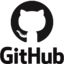](https://github.com/willclopes)


---


[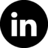 ](https://www.linkedin.com/in/willclopes/)





---

[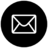](willclopes@gmail.com)

 



